# Conflicting Labeling

In [229]:
import numpy as np
import pandas as pd
import re
import string
import unidecode #pip install unidecode
%matplotlib inline
import matplotlib.pyplot as plt

# Read original csv file
df = pd.read_csv('tweets_public.csv', encoding='utf-16', index_col='tweet_id', sep=',')
# Keep relevant columns only
#df = df0.drop(['retweet_count','is_reply','reply_count'], axis=1)
df

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,
942743012337123328,positive,False,0,0,"""Los pilotos de Ryanair desconvocan la huelga ...",NaN,Mon Dec 18 13:07:04 +0000 2017,NaN,Dublin
926857871916183553,positive,True,0,0,"@Iberia @lavecinarubia Si ,por favor las decla...",NaN,Sat Nov 04 17:05:11 +0000 2017,NaN,NaN
936979305720090626,neutral,True,0,0,@Iberia Me dirías por favor que costo tiene?,NaN,Sat Dec 02 15:24:09 +0000 2017,NaN,NaN
943983853802328064,negative,True,0,0,"@SupermanlopezN @Iberia @giroditalia Champion,...",NaN,Thu Dec 21 23:17:43 +0000 2017,NaN,Central Time (US & Canada)
938207464457211904,negative,True,0,0,@SrtaFarrellDM @KLM @Iberia Eso de avianca es ...,NaN,Wed Dec 06 00:44:25 +0000 2017,NaN,Eastern Time (US & Canada)
931526746301714435,neutral,True,0,0,"@Iberia hola, no conozco mi numéro IBERIA PLUS...",NaN,Fri Nov 17 14:17:37 +0000 2017,NaN,NaN
933385784228532233,neutral,False,0,0,El canal Smithsonian reconstruye en video el a...,NaN,Wed Nov 22 17:24:47 +0000 2017,NaN,NaN
932856751099142144,positive,False,0,0,"Con @Iberia, mi destino a un solo click. ¡Dese...",NaN,Tue Nov 21 06:22:35 +0000 2017,NaN,NaN
927623530585509889,negative,True,0,0,@facua Pueden ayudarme con una maleta perdida ...,NaN,Mon Nov 06 19:47:38 +0000 2017,NaN,NaN


In [207]:
import unidecode

def delete_urlvideodots(tweet):
    #Delete URLs www.* or https?://*
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    #Delete VIDEO
    tweet = re.sub('((\[VIDEO\])|(#VIDEO)|#vIDEO)','',tweet)
    #Delete .... at the end of the tweet
    #tweet = re.sub(r'\w*\W$','',tweet)
    # Remove accents
    tweet = unidecode.unidecode(tweet)
    #Remove additional white spaces
    tweet = re.sub('\s+', ' ', tweet)
    return tweet

df['cleantext'] = df['text'].apply(delete_urlvideodots)

# Count the ocurrences of each unique element in the 'cleantext' column
unicos = df['cleantext'].value_counts()
diff_tweets = unicos.index.tolist() # List of unique tweets
num_occurences = unicos.values.tolist() # List of occurences
df.sort_values('cleantext',ascending=False)

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleantext
tweet_id,,,,,,,,,,
942798471588974592,negative,False,0,0,| Airbus A340-642 | Aerolinea: @Iberia | Regis...,NaN,Mon Dec 18 16:47:26 +0000 2017,NaN,Madrid,| Airbus A340-642 | Aerolinea: @Iberia | Regis...
925317351687540736,neutral,False,0,0,yo deberia haber estado en ese avion https://t...,NaN,Tue Oct 31 11:03:42 +0000 2017,NaN,Amsterdam,yo deberia haber estado en ese avion
947510187547594753,negative,False,0,0,yo al 2018 lo que le pido es poder echarme la ...,NaN,Sun Dec 31 16:50:07 +0000 2017,NaN,Belgrade,yo al 2018 lo que le pido es poder echarme la ...
930436773066526720,neutral,False,0,0,ya vieron la PROpaganda de Iberia en la tv? &gt;(,NaN,Tue Nov 14 14:06:28 +0000 2017,NaN,Buenos Aires,ya vieron la PROpaganda de Iberia en la tv? &gt;(
936020950402977792,positive,False,0,0,y cual es el mejor tiempo para viajar ya que e...,NaN,Wed Nov 29 23:55:59 +0000 2017,NaN,Eastern Time (US & Canada),y cual es el mejor tiempo para viajar ya que e...
944246929969614849,negative,False,0,0,vuelo ib8847 con salida de Sevilla a las 16:15...,NaN,Fri Dec 22 16:43:06 +0000 2017,NaN,Athens,vuelo ib8847 con salida de Sevilla a las 16:15...
938121135010598912,positive,False,0,0,video avion aerolinea espanol iberia video aer...,NaN,Tue Dec 05 19:01:22 +0000 2017,NaN,NaN,video avion aerolinea espanol iberia video aer...
923955841052631040,negative,False,0,0,viajas y encima te dan un note8 ??!!??!! https...,NaN,Fri Oct 27 16:53:33 +0000 2017,NaN,Belgrade,viajas y encima te dan un note8 ??!!??!!
927444615384485888,positive,False,0,0,viajando a Casablanca desde Sala VIP Iberia T-...,NaN,Mon Nov 06 07:56:42 +0000 2017,NaN,NaN,viajando a Casablanca desde Sala VIP Iberia T-...


In [208]:
# Force the 'cleantext' column to be the index
df1 = df.set_index('cleantext')
# Keep tweet_id
df1 = pd.concat([df1, pd.DataFrame(data=df.index.values,index=df.cleantext,columns=['tweet_id'])], axis=1)
# Select only airline_sentiment and create a one-hot encoding.
textVSsentiment = pd.get_dummies(df1['airline_sentiment'])
textVSsentiment.head()

,negative,neutral,positive
cleantext,,,
"""Los pilotos de Ryanair desconvocan la huelga tras ver reconocidos sus sindicatos"" by El Pais via Ultimas noticias...",0,0,1
"@Iberia @lavecinarubia Si ,por favor las declaraciones de amor entre los #rubijarena no pueden quedarse en una ma...",0,0,1
@Iberia Me dirias por favor que costo tiene?,0,1,0
"@SupermanlopezN @Iberia @giroditalia Champion, no vuele mas con esos descarados.",1,0,0
@SrtaFarrellDM @KLM @Iberia Eso de avianca es verdad a mi mama le paso dos veces terrible esa aerolinea,1,0,0


In [209]:
spolls = textVSsentiment.groupby('cleantext').sum()
spolls['all'] = spolls.positive + spolls.negative + spolls.neutral

type(spolls)
spolls.sort_values('all',ascending=False)

,negative,neutral,positive,all
cleantext,,,,
"Con @Iberia, mi destino a un solo click. !Deseadme suerte! #HolaColombia. Hola 79 destinos europeos al mejor precio",21,76,56,153
"Con @Iberia, mi destino a un solo click. !Deseadme suerte! #HolaArgentina. Hola 79 destinos europeos al mejor precio",14,91,44,149
"Asi fue el accidente del vuelo 5022 de Spanair, el mas letal en Espana en 2 decadas",76,48,0,124
Iberia Plus cumple 25 anos. Queremos celebrarlo contigo de una manera muy especial. Elige tu numero favorito y... !...,7,36,36,79
Ryanair retrasa hasta el 15 enero su cambio en la politica de equipaje de mano,7,12,4,23
@Iberia RT POR FAVOR: PASAJEROS QUE IBERIA LES DEMORA LA DEVOLUCION DEL DINERO. JODAMOSLOS. RETUITEEMOS y COMPARTAM...,22,0,0,22
"Japon Directo, vuelo con IBERIA a Tokyo, 10 dias desde 2.990EUR Tax Incl.",7,9,3,19
Iberia inaugura un nuevo espacio Premium para sentirte como una reina o un rey,4,0,12,16
@Ryanair Madrid #TravelThursday,3,7,4,14


In [210]:
id1 = spolls[(spolls.positive == spolls.negative) & (spolls.neutral == 0)].index.tolist()
id2 = spolls[(spolls.neutral == spolls.negative) & (spolls.positive == 0)].index.tolist()
id3 = spolls[(spolls.positive == spolls.neutral) & (spolls.negative == 0)].index.tolist()
id4 = spolls[(spolls.positive == spolls.negative) & (spolls.negative == spolls.neutral)].index.tolist()
tweets_tie = id1+id2+id3+id4
spolls = spolls.drop(tweets_tie)
spolls.sort_values('all',ascending=False)

print(spolls.shape)
print(len(tweets_tie))
print(tweets_tie)

(6813, 4)
71
['@crmontoro @lusosaylor1 @Steglitz82 @GodofredoIV @robertstark91 @silvia_yucca @Ernesto_Fado @Alekrinora @Morafanova... ', 'Aplaudir cuando aterriza un avion de Ryanair no es ninguna tonteria.', 'Iberia Express celebra sus cinco anos con una oferta de 5.000 plazas a solo 5 euros. ', 'Iberia se la tiene jurada al ciclista Ivan Cortina, pierde la bici y luego se la rompe - Parece que la compania aer... ', 'Iberia, una aerolinea 4 estrellas que une Buenos Aires-Madrid con vuelos directos via @ambitocom', 'Los sindicatos de Ryanair en Irlanda y Portugal suspenden los paros navidenos ', 'Ofrecemos los suiguientes destinos : ARGENTINA-GOL AIRLINES 600$ MADRID-IBERIA AIRLINES 1200$ CHILE-LATHAN A... ', 'Ryanair se suma al Black Friday con 100.000 billetes a 4,99 euros para volar en enero ', 'Ryanair sufre en Alemania la primera huelga de pilotos de su historia ', '#Puebla: Un pasajero de un vuelo de la compania Ryanair entre Londres y Malaga, en el sur de Espana, se sento sobre.

In [211]:
for tweet in tweets_tie:
    df1 = df1.drop(tweet,axis=0)

In [212]:
sentiments = ['positive','negative','neutral']
for s in sentiments:
    spolls[s] = spolls.apply(lambda x: x[s]/x['all']*100., axis=1)
    
spolls.sort_values('all',ascending=False)

,negative,neutral,positive,all
cleantext,,,,
"Con @Iberia, mi destino a un solo click. !Deseadme suerte! #HolaColombia. Hola 79 destinos europeos al mejor precio",13.725490,49.673203,36.601308,153
"Con @Iberia, mi destino a un solo click. !Deseadme suerte! #HolaArgentina. Hola 79 destinos europeos al mejor precio",9.395973,61.073826,29.530200,149
"Asi fue el accidente del vuelo 5022 de Spanair, el mas letal en Espana en 2 decadas",61.290323,38.709677,0.000000,124
Iberia Plus cumple 25 anos. Queremos celebrarlo contigo de una manera muy especial. Elige tu numero favorito y... !...,8.860759,45.569620,45.569620,79
Ryanair retrasa hasta el 15 enero su cambio en la politica de equipaje de mano,30.434783,52.173913,17.391305,23
@Iberia RT POR FAVOR: PASAJEROS QUE IBERIA LES DEMORA LA DEVOLUCION DEL DINERO. JODAMOSLOS. RETUITEEMOS y COMPARTAM...,100.000000,0.000000,0.000000,22
"Japon Directo, vuelo con IBERIA a Tokyo, 10 dias desde 2.990EUR Tax Incl.",36.842105,47.368421,15.789473,19
Iberia inaugura un nuevo espacio Premium para sentirte como una reina o un rey,25.000000,0.000000,75.000000,16
@Ryanair Madrid #TravelThursday,21.428571,50.000000,28.571430,14


In [213]:
# Delete those with 1 occurence or labeled unanonimously with one single sentiment
conflict = spolls[(spolls['positive'] < 100) & (spolls['negative'] < 100) & (spolls['neutral'] < 100)]
#conflictsent = conflict.drop(['all'], axis=1)
conflictsent = conflict.sort_values('negative',ascending=True)
conflictsent

,negative,neutral,positive,all
cleantext,,,,
"Iberia, una aerolinea 4 estrellas que une Buenos Aires-Madrid con vuelos directos",0.000000,75.000000,25.000000,4
@Iberia Gracias,0.000000,75.000000,25.000000,4
Iberia y Air Europa lanzan sus rebajas con vuelos a Europa desde 29 euros via @elpais_economia,0.000000,44.444444,55.555558,9
ULTIMA HORA: Oferta Ryanair vuelos a 2 euros Via VuelosA1Euro,0.000000,25.000000,75.000000,4
Iberia Express renueva su carta menu e incorpora nuevos contenidos a su oferta,0.000000,33.333333,66.666669,3
"Ryanair busca convertirse en el ""Amazon de los viajes"" desde sus oficinas en Madrid",0.000000,76.923077,23.076923,13
Iberia Express celebra sus cinco anos con una oferta de 5.000 plazas a solo 5 euros,0.000000,40.000000,60.000002,5
Barometro #Business: Iberia (57%) y Vueling (61%) son las companias aereas mas utilizadas en los #viajes de...,0.000000,33.333333,66.666669,3
Hace 90 anos Iberia unio Madrid y Barcelona por 163 pesetas. ?Cuanto costaria hoy ese billete? via @elpais_economia,0.000000,83.333333,16.666667,6


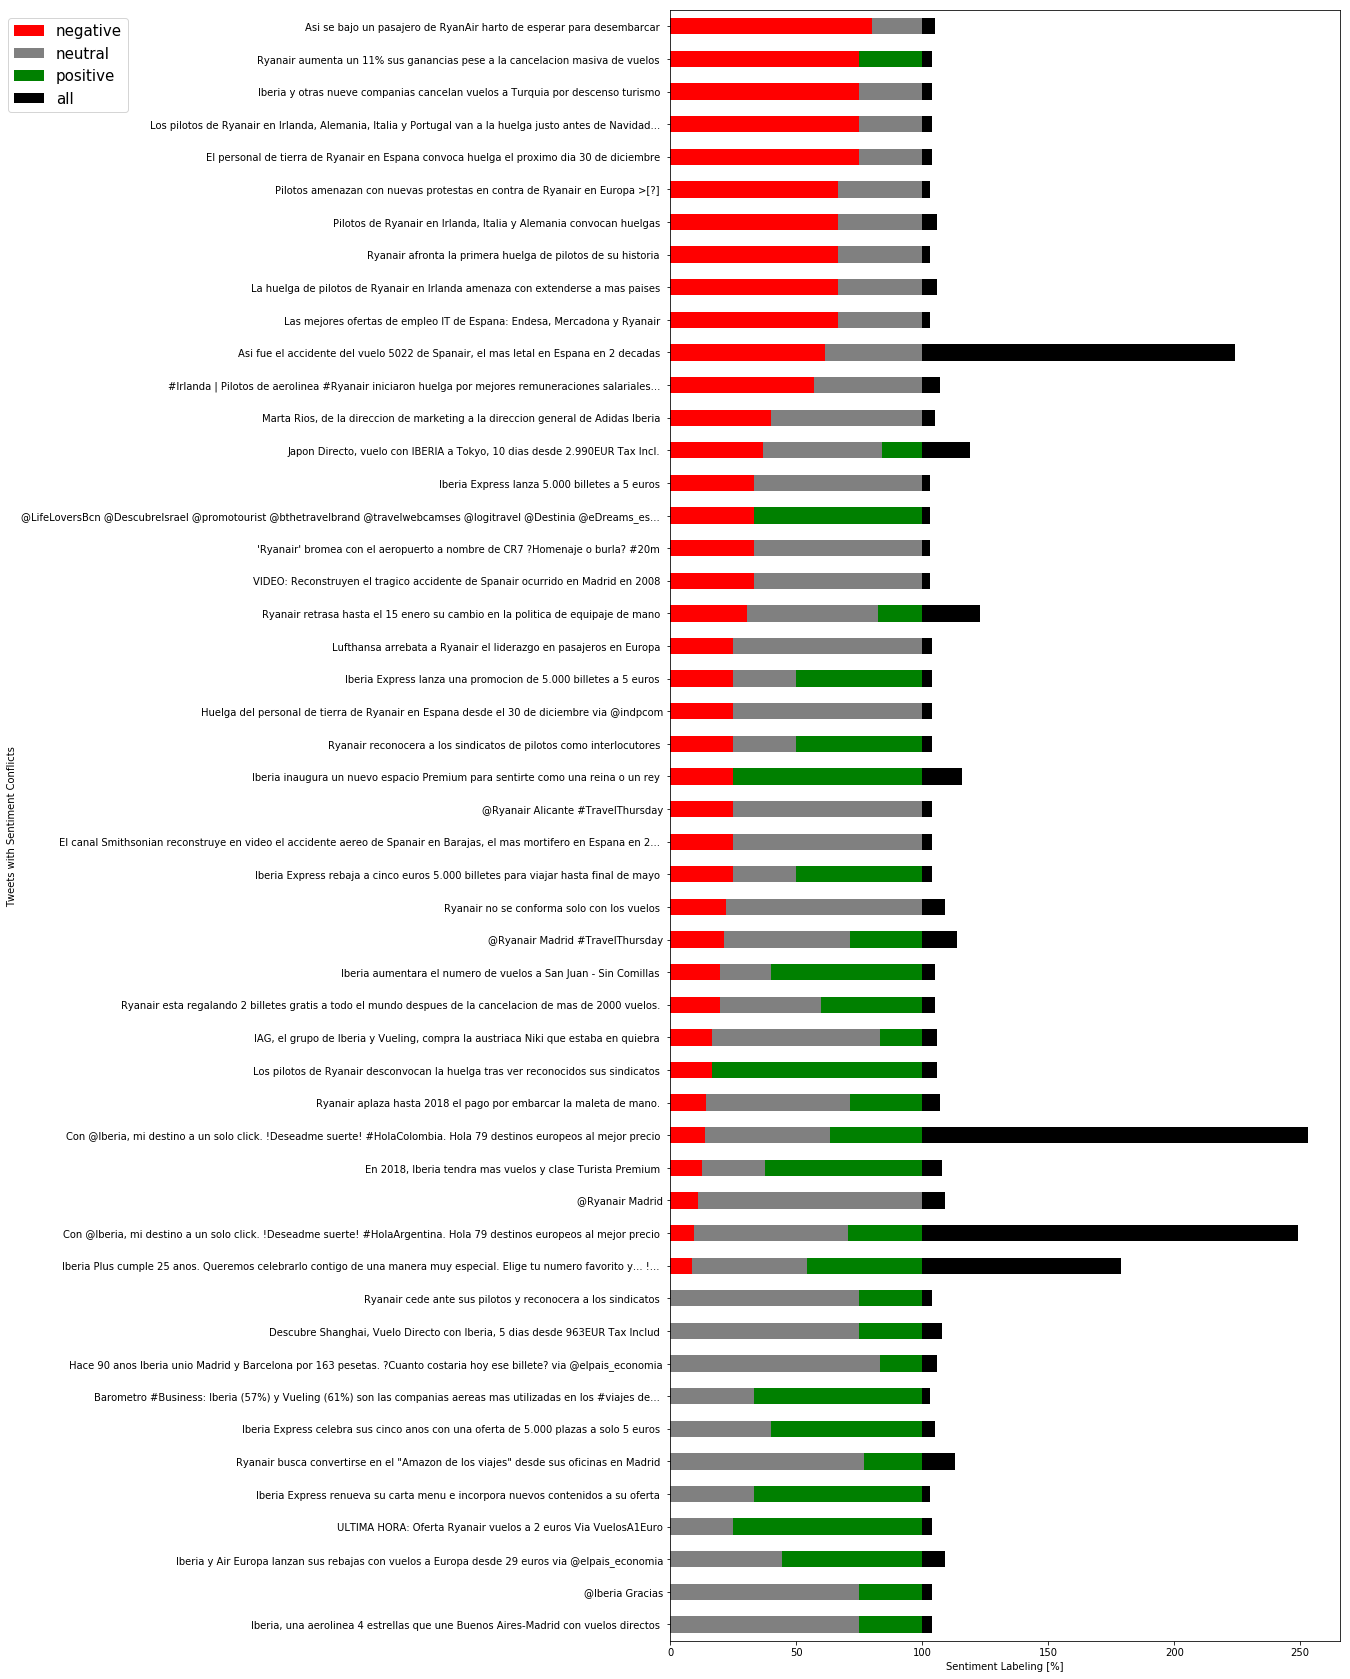

In [214]:
my_colors = ['r', 'gray', 'g','black'] 
ax = conflictsent.plot(kind='barh',stacked=True, color=my_colors,figsize=(12, 30))
ax.legend(loc='upper left',bbox_to_anchor=(-1, 1),prop={'size': 15})
ax.set_ylabel('Tweets with Sentiment Conflicts')
ax.set_xlabel('Sentiment Labeling [%]')
#plt.savefig("ConflictingTweets.png",dpi= 300, bbox_inches='tight')
plt.show()

In [215]:
# Delete duplicated tweets
df2 = df.drop_duplicates(subset='cleantext',keep='first') 
df3 = df2.drop('cleantext',axis=1)
# df3 contains no repeated tweets!!

In [216]:
df3.shape

(6884, 9)

In [217]:
df.shape

(7867, 10)

In [218]:
print(sum(num_occurences[0:205]))

1178


In [219]:
print('Number of tweets if we delete all duplicated tweets:',7867 - sum(num_occurences[0:205]))

Number of tweets if we delete all duplicated tweets: 6689


In [220]:
print('Number of tweets if we keep 1 duplicated tweet:',df2.shape)

Number of tweets if we keep 1 duplicated tweet: (6884, 10)


In [221]:
conflictsent = conflict.drop(['all'], axis=1)
# Assign most common sentiment to tweets with conflicting polls
conflictsent['truesentiment'] = conflictsent.idxmax(axis=1)

In [222]:
conflictsent

,negative,neutral,positive,truesentiment
cleantext,,,,
#Irlanda | Pilotos de aerolinea #Ryanair iniciaron huelga por mejores remuneraciones salariales...,57.142857,42.857143,0.000000,negative
'Ryanair' bromea con el aeropuerto a nombre de CR7 ?Homenaje o burla? #20m,33.333333,66.666667,0.000000,neutral
@Iberia Gracias,0.000000,75.000000,25.000000,neutral
@LifeLoversBcn @DescubreIsrael @promotourist @bthetravelbrand @travelwebcamses @logitravel @Destinia @eDreams_es...,33.333333,0.000000,66.666669,positive
@Ryanair Alicante #TravelThursday,25.000000,75.000000,0.000000,neutral
@Ryanair Madrid,11.111111,88.888889,0.000000,neutral
@Ryanair Madrid #TravelThursday,21.428571,50.000000,28.571430,neutral
"Asi fue el accidente del vuelo 5022 de Spanair, el mas letal en Espana en 2 decadas",61.290323,38.709677,0.000000,negative
Asi se bajo un pasajero de RyanAir harto de esperar para desembarcar,80.000000,20.000000,0.000000,negative


In [223]:
# Create new column with most common label for each conflicting tweet
df1['newairline_sentiment'] = df1['airline_sentiment']

lista = conflictsent.index
for tweet in lista:
    df1['newairline_sentiment'].replace(df1.loc[tweet,'airline_sentiment'],
                                                conflictsent.loc[tweet]['truesentiment'], inplace=True)

In [224]:
df1.loc[lista[3:4]]

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,tweet_id,newairline_sentiment
cleantext,,,,,,,,,,,
@LifeLoversBcn @DescubreIsrael @promotourist @bthetravelbrand @travelwebcamses @logitravel @Destinia @eDreams_es...,negative,True,0,0,@LifeLoversBcn @DescubreIsrael @promotourist @...,NaN,Thu Jan 04 09:53:23 +0000 2018,NaN,Madrid,948854866528620546,positive
@LifeLoversBcn @DescubreIsrael @promotourist @bthetravelbrand @travelwebcamses @logitravel @Destinia @eDreams_es...,positive,True,0,0,@LifeLoversBcn @DescubreIsrael @promotourist @...,NaN,Thu Jan 04 09:17:31 +0000 2018,NaN,Pacific Time (US & Canada),948845839778308096,positive
@LifeLoversBcn @DescubreIsrael @promotourist @bthetravelbrand @travelwebcamses @logitravel @Destinia @eDreams_es...,positive,True,0,0,@LifeLoversBcn @DescubreIsrael @promotourist @...,NaN,Thu Jan 04 10:38:41 +0000 2018,NaN,Madrid,948866265757732864,positive


In [225]:
dfsave = df1.set_index('tweet_id')
dfsave.to_csv('tweets_public2.csv', encoding='utf-16', sep=',')

In [226]:
# Read new csv file
df = pd.read_csv('tweets_public2.csv', encoding='utf-16', index_col='tweet_created', sep=',')

df['cleantext'] = df['text'].apply(delete_urlvideodots)

# Force the 'cleantext' column to be the index
df1 = df.set_index('cleantext')
# Select only airline_sentiment and create a one-hot encoding.
textVSsentiment2 = pd.get_dummies(df1['newairline_sentiment'])

sentiment_polls = textVSsentiment2.groupby('cleantext').sum()
sentiment_polls['all'] = sentiment_polls.positive + sentiment_polls.negative + sentiment_polls.neutral

sentiment_polls.sort_values('all',ascending=False)

,negative,neutral,positive,all
cleantext,,,,
"Con @Iberia, mi destino a un solo click. !Deseadme suerte! #HolaColombia. Hola 79 destinos europeos al mejor precio",0,153,0,153
"Con @Iberia, mi destino a un solo click. !Deseadme suerte! #HolaArgentina. Hola 79 destinos europeos al mejor precio",0,149,0,149
"Asi fue el accidente del vuelo 5022 de Spanair, el mas letal en Espana en 2 decadas",124,0,0,124
Iberia Plus cumple 25 anos. Queremos celebrarlo contigo de una manera muy especial. Elige tu numero favorito y... !...,0,79,0,79
Ryanair retrasa hasta el 15 enero su cambio en la politica de equipaje de mano,0,23,0,23
@Iberia RT POR FAVOR: PASAJEROS QUE IBERIA LES DEMORA LA DEVOLUCION DEL DINERO. JODAMOSLOS. RETUITEEMOS y COMPARTAM...,22,0,0,22
"Japon Directo, vuelo con IBERIA a Tokyo, 10 dias desde 2.990EUR Tax Incl.",0,19,0,19
Iberia inaugura un nuevo espacio Premium para sentirte como una reina o un rey,0,0,16,16
@Ryanair Madrid #TravelThursday,0,14,0,14


In [227]:
df.shape

(7706, 11)